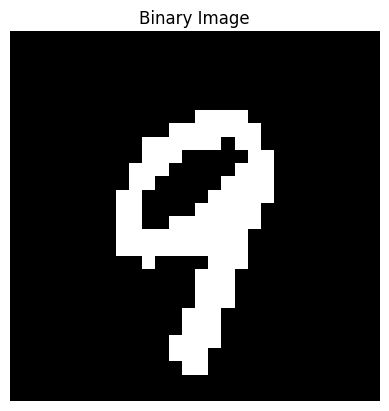

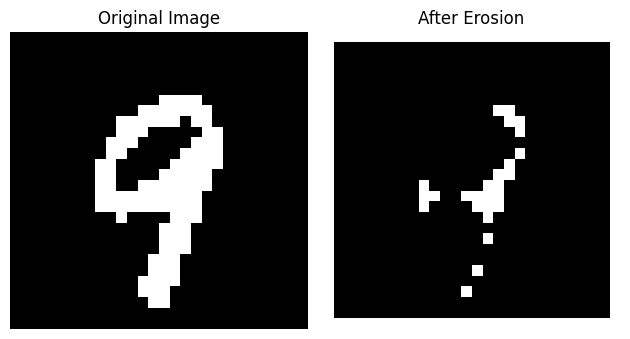

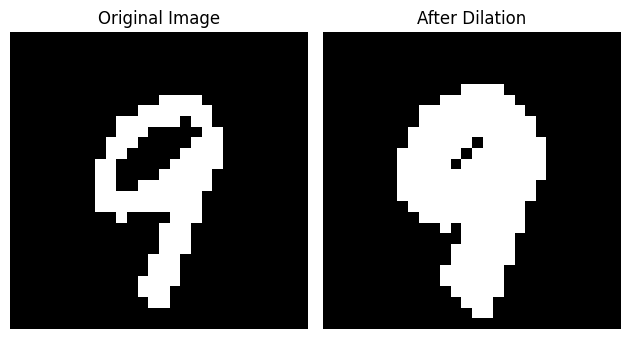

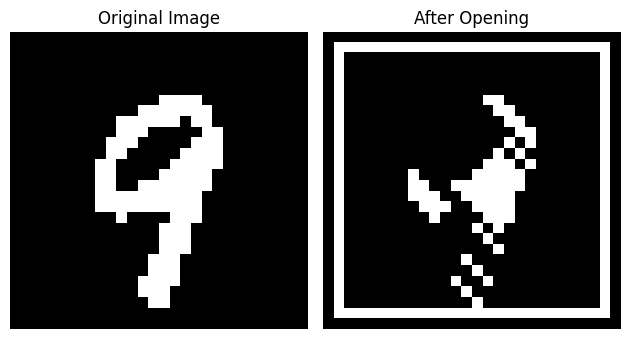

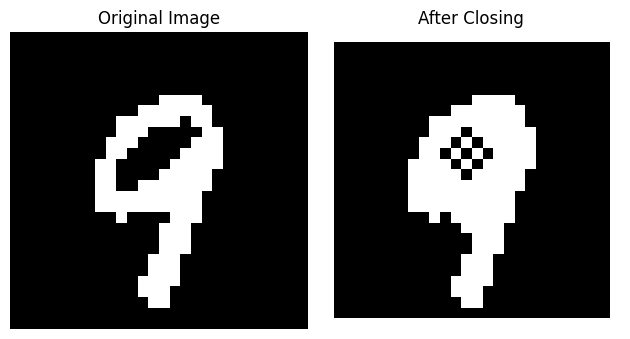

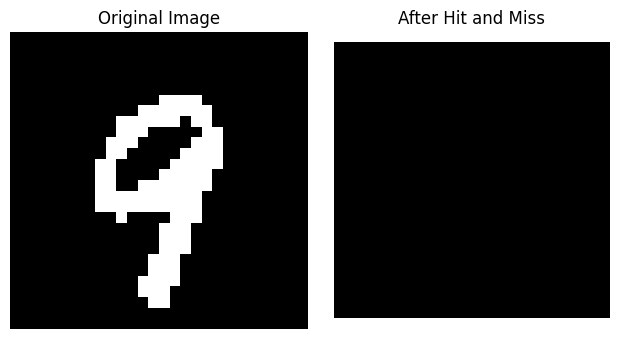

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

image_index = np.random.randint(0, test.shape[0])
image = test.iloc[image_index, 1:].values.reshape(28, 28).astype(np.uint8)

threshold = 127
thresh = np.where(image > threshold, 255, 0).astype(np.uint8)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.title("Binary Image")
plt.show()

structuring_element = np.array([[1, 0, 0],
                                [0, 1, 0],
                                [0, 0, 1]])

def erosion(image, se):
    se_height, se_width = se.shape
    image_height, image_width = image.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    output_image = np.full_like(image, 255)
    for y in range(se_center_y, image_height - se_center_y):
        for x in range(se_center_x, image_width - se_center_x):
            region = image[y - se_center_y:y + se_center_y + 1, x - se_center_x:x + se_center_x + 1]
            if region.shape == se.shape:
                if np.all(region[se == 1] == 255):
                    output_image[y, x] = 255
                else:
                    output_image[y, x] = 0
    return output_image

def dilation(image, se):
    se_height, se_width = se.shape
    image_height, image_width = image.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    output_image = np.full_like(image, 0)
    for y in range(se_center_y, image_height - se_center_y):
        for x in range(se_center_x, image_width - se_center_x):
            region = image[y - se_center_y:y + se_center_y + 1, x - se_center_x:x + se_center_x + 1]
            if region.shape == se.shape:
                if np.any(region[se == 1] == 255):
                    output_image[y, x] = 255
    return output_image

def opening(image, se):
    eroded = erosion(image, se)
    opened = dilation(eroded, se)
    return opened

def closing(image, se):
    dilated = dilation(image, se)
    closed = erosion(dilated, se)
    return closed

def hit_and_miss(image, hit_se, miss_se):
    hit_result = erosion(image, hit_se)
    miss_result = erosion(255 - image, miss_se)
    return np.where((hit_result == 255) & (miss_result == 255), 255, 0).astype(np.uint8)


eroded = erosion(thresh, structuring_element)
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('After Erosion')
plt.axis('off')
plt.tight_layout()
plt.show()


dilated = dilation(thresh, structuring_element)
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('After Dilation')
plt.axis('off')
plt.tight_layout()
plt.show()


opened = opening(thresh, structuring_element)
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.title('After Opening')
plt.axis('off')
plt.tight_layout()
plt.show()

closed = closing(thresh, structuring_element)
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title('After Closing')
plt.axis('off')
plt.tight_layout()
plt.show()


se2 = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

se3 = np.array([[0, 0, 1],
                [0, 1, 0],
                [1, 0, 0]])

hitmiss = hit_and_miss(thresh, se2, se3)
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hitmiss, cmap='gray')
plt.title('After Hit and Miss')
plt.axis('off')
plt.tight_layout()
plt.show()


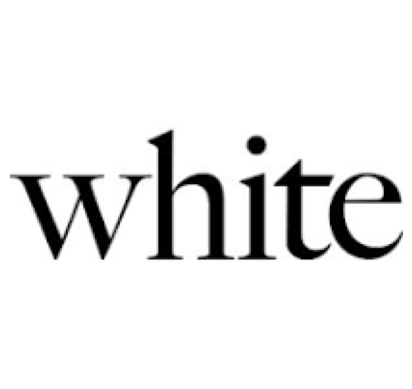

The image is not binary.


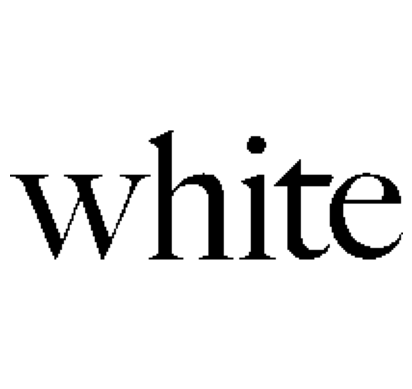

The image is binary.


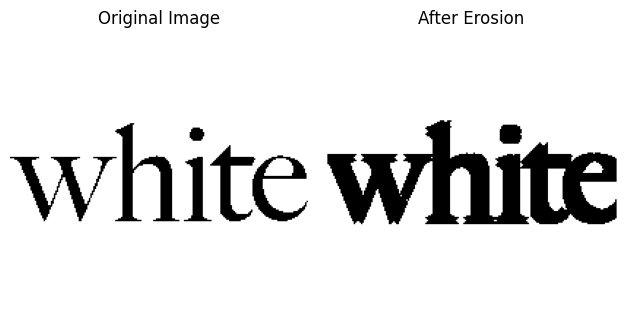

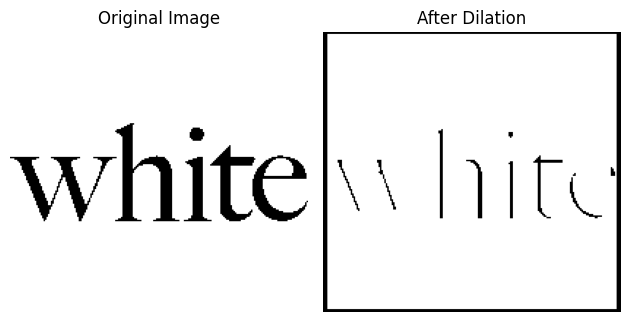

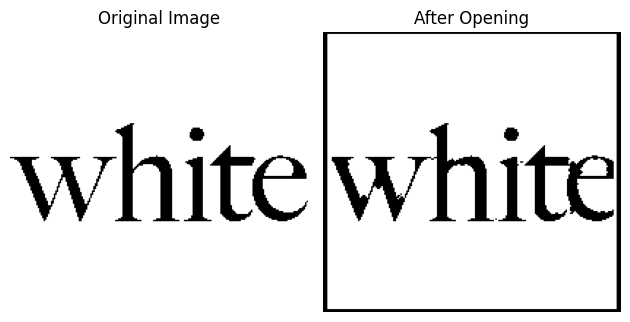

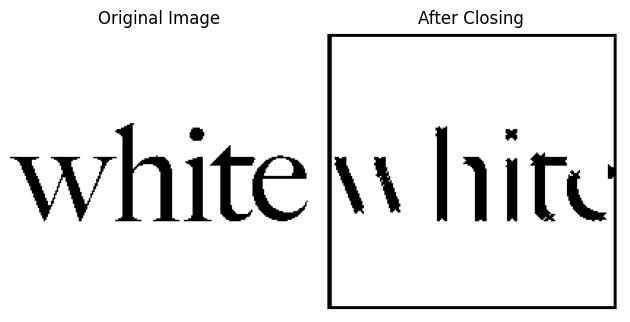

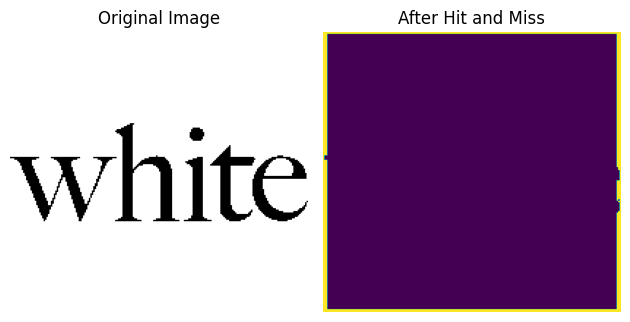

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image_path = '2.png'
image = np.array(Image.open(image_path).convert('L'))

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

def is_binary_image(image):
    unique_values = np.unique(image)
    return len(unique_values) <= 2

if is_binary_image(image):
    print("The image is binary.")
else:
    print("The image is not binary.")

threshold = 127
thresh = np.where(image > threshold, 255, 0).astype(np.uint8)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

if is_binary_image(thresh):
    print("The image is binary.")
else:
    print("The image is not binary.")

structuring_element = np.array([[1, 0, 0, 0, 0, 1],
                                [0, 1, 0, 0, 1, 0],
                                [0, 0, 1, 1, 0, 0],
                                [0, 1, 0, 0, 1, 0],
                                [1, 0, 0, 0, 0, 1]])

def erosion(image, se):
    se_height, se_width = se.shape
    image_height, image_width = image.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    output_image = np.full_like(image, 255)
    for y in range(se_center_y, image_height - se_center_y):
        for x in range(se_center_x, image_width - se_center_x):
            local_min = 255
            for j in range(se_height):
                for i in range(se_width):
                    if se[j, i] == 1:
                        pixel_value = image[y + j - se_center_y, x + i - se_center_x]
                        local_min = min(local_min, pixel_value)
            output_image[y, x] = local_min
    return output_image


eroded = erosion(thresh, structuring_element)


plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('After Erosion')
plt.axis('off')
plt.tight_layout()
plt.show()


def dilation(image, se):
    se_height, se_width = se.shape
    image_height, image_width = image.shape
    se_center_y, se_center_x = se_height // 2, se_width // 2
    output_image = np.full_like(image, 0)
    for y in range(se_center_y, image_height - se_center_y):
        for x in range(se_center_x, image_width - se_center_x):
            local_max = 0
            for j in range(se_height):
                for i in range(se_width):
                    if se[j, i] == 1:
                        pixel_value = image[y + j - se_center_y, x + i - se_center_x]
                        local_max = max(local_max, pixel_value)
            output_image[y, x] = local_max
    return output_image


dilated = dilation(thresh, structuring_element)


plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title('After Dilation')
plt.axis('off')
plt.tight_layout()
plt.show()


def opening(image, se):
    eroded = erosion(image, se)
    opened = dilation(eroded, se)
    return opened


opened = opening(thresh, structuring_element)


plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(opened, cmap='gray')
plt.title('After Opening')
plt.axis('off')
plt.tight_layout()
plt.show()


def closing(image, se):
    dilated = dilation(image, se)
    closed = erosion(dilated, se)
    return closed


closed = closing(thresh, structuring_element)


plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closed, cmap='gray')
plt.title('After Closing')
plt.axis('off')
plt.tight_layout()
plt.show()

se2 = np.array([[1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]])

se3 = np.array([[1, 0, 0, 0, 0, 1],
                [0, 1, 0, 0, 1, 0],
                [0, 0, 1, 1, 0, 0],
                [0, 1, 0, 0, 1, 0],
                [1, 0, 0, 0, 0, 1]])


def hit_and_miss(image, hit_se, miss_se):
    hit_result = erosion(image, hit_se)
    miss_result = erosion(255 - image, miss_se)
    return np.where((hit_result == 255) & (miss_result == 255), 255, 0).astype(np.uint8)


hitmiss = hit_and_miss(thresh, se2, se3)


plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hitmiss, cmap='gray')
plt.title('After Hit and Miss')
plt.axis('off')
plt.tight_layout()
plt.show()
